In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns

# Determining training epochs

The below code is meant to help determine the right number of training epochs for each task and domain

In [6]:
domains = ["laptop","rest"]
model = ["pt"]
tasks = ["ae_bert-base-uncased_5_runs","asc_bert-base-uncased_5_runs"]
prefix = "run/"
runs = 5
file = "valid.json"

# tasks=["ae_spanbert-base-cased"]
# berts=["pt"]
# domains=["laptop"]
# runs=5
# testing=True
# %run eval/eval.ipynb

In [7]:
data = []
for m in model:
    for t in tasks:
        for d in domains:
            for i in range(1,runs+1):
                path = prefix+m+"_"+t+"/"+d+"/"+str(i)+"/"+file
                losses = json.load(open(path, 'r'))["valid_losses"]
                for epoch in range(len(losses)):
                    data.append(
                        {
                            "model":m,
                            "task":t,
                            "domain":d,
                            "run":i,
                            "epoch":epoch+1,
                            "valid_loss": losses[epoch]
                        }
                    )
data = pd.DataFrame(data)
data

,model,task,domain,run,epoch,valid_loss
0,pt,ae_bert-base-uncased_5_runs,laptop,1,1,95.490184
1,pt,ae_bert-base-uncased_5_runs,laptop,1,2,100.262790
2,pt,ae_bert-base-uncased_5_runs,laptop,1,3,139.188351
3,pt,ae_bert-base-uncased_5_runs,laptop,1,4,143.846602
4,pt,ae_bert-base-uncased_5_runs,laptop,2,1,87.758746
...,...,...,...,...,...,...
75,pt,asc_bert-base-uncased_5_runs,rest,4,4,3.003035
76,pt,asc_bert-base-uncased_5_runs,rest,5,1,2.717808
77,pt,asc_bert-base-uncased_5_runs,rest,5,2,2.365749
78,pt,asc_bert-base-uncased_5_runs,rest,5,3,2.955897


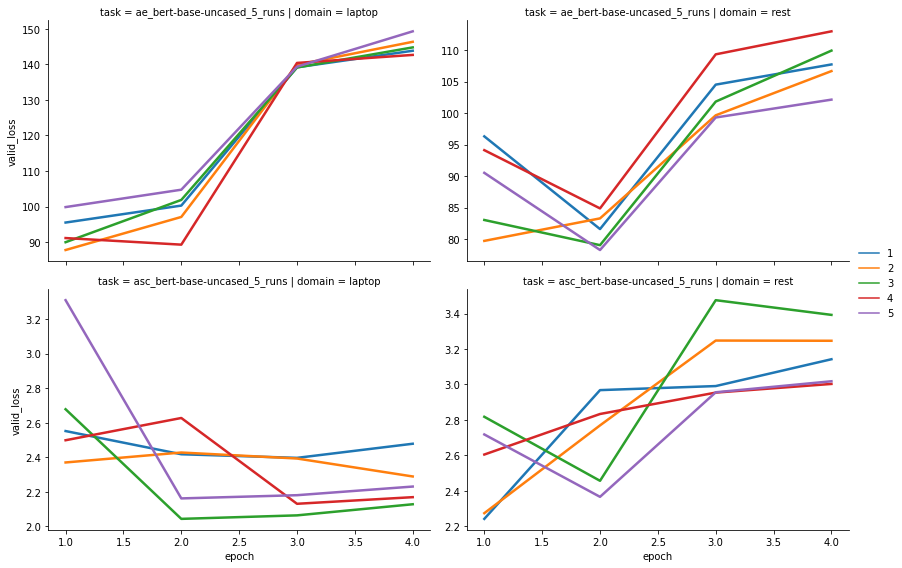

In [8]:
g = sns.FacetGrid(data, col="domain", row="task", sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x="epoch",
         y="valid_loss",
         hue="run",
         palette="tab10", 
         linewidth=2.5)
g.add_legend()
g.savefig("validation_losses.png");

In [9]:
data.groupby(by=["model","task","domain","epoch"])[["valid_loss"]]\
    .mean()\
    .reset_index()\
    .pivot(index=["model","task","domain"], columns=["epoch"])

valid_loss                         \
epoch                                              1          2           3   
model task                         domain                                     
pt    ae_bert-base-uncased_5_runs  laptop  92.834415  98.637753  139.601487   
                                   rest    88.733029  81.411847  102.910612   
      asc_bert-base-uncased_5_runs laptop   2.681657   2.335580    2.232896   
                                   rest     2.530942   2.678499    3.124933   

                                                       
epoch                                               4  
model task                         domain              
pt    ae_bert-base-uncased_5_runs  laptop  145.398317  
                                   rest    107.868630  
      asc_bert-base-uncased_5_runs laptop    2.258991  
                                   rest      3.160612